# Case - Definindo um modelo de machine learning para prever casos de churn em uma instuição financeira

## Introdução

Um gerente de um banco não está satisfeito com o fato de cada vez mais clientes abandonarem os serviços de cartão de crédito. Visando entender o que pode estar acontecendo e tentar prever quando um cliente se tornará churn, a instituição financeira disponibilizou um dataset com dados de todos seus clientes.

## Objetivo do projeto

Utilizando o dataset disponível, o objetivo do presente projeto é definir um modelo de machine learning para prever os casos de churn e identificar estratégias para evitar que isso com mais frequência.

## Sobre os dados

O dataset disponibilizado consiste em dados dos mais de 10.000 clientes, mencionando idade, salário, estado civil, limite do cartão de crédito, categoria do cartão de crédito, etc. Abaixo segue o descritivo de cada uma das colunas presentes na tabela de dados.

- CLIENTNUM: Identificador exclusivo do cliente titular da conta;
- Attrition_Flag: Variável de evento interno (atividade do cliente), nos diz se a conta do cliente foi encerrada ou não;
- Customer_Age: Idade do cliente;
- Gender: Gênero do cliente (masculino ou feminino);
- Dependent_count: Número de dependentes;
- Education_Level: Nível educacional;
- Marital_Status: Casado, Solteiro, Divorciado, Desconhecido;
- Income_Category: Renda anual;
- Card_Category: Tipo de Cartão (Azul, Prata, Ouro, Platina);
- Months_on_book: Período de relacionamento com banco;
- Total_Relationship_Count: Total de produtos detidos pelo cliente;
- Months_Inactive_12_mon: Nº de meses inativos nos últimos 12 meses;
- Contacts_Count_12_mon: Nº de contatos nos últimos 12 meses;
- Credit_Limit: Limite de crédito no cartão de crédito;
- Total_Revolving_Bal: Saldo Rotativo Total no Cartão de Crédito;
- Avg_Open_To_Buy: Linha de crédito aberta para compra (média dos últimos 12 meses);
- Total_Amt_Chng_Q4_Q1: Alteração no valor da transação (quarto trimestre em relação ao primeiro trimestre);
- Total_Trans_Amt: Valor total da transação (últimos 12 meses);
- Total_Trans_Ct: Contagem total de transações (últimos 12 meses);
- Total_Ct_Chng_Q4_Q1: Mudança na contagem de transações (quarto trimestre em relação ao primeiro trimestre);
- Avg_Utilization_Ratio: Taxa média de utilização do cartão.

## Bibliotecas utilizadas

Para fazer este projeto foram utilizadas as seguintes bibliotecas do Python,

In [183]:
# libs de análise e manipulação dos dados
import pandas as pd
import numpy as np

# libs de visualização dos dados e análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# libs de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

## Importando os dados

Primeiro, importou-se o dataset "BankChurners.csv", disponível na lista de arquivos deste repositório, utilizando-se a biblioteca Pandas,

In [136]:
pd.set_option('display.max_columns', 50)    # config para mostrar todas as colunas do dataset

base_dados = pd.read_csv('BankChurners.csv', sep = ';')
base_dados.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Análise Descritiva e Exploratória dos dados

Exibindo-se mais informações a respeito deste dataset,

In [137]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Pelos resultados, percebe-se que o dataset tem 10127 linhas, sendo que aparentemente não existe dado nulo em nenhuma das 21 colunas, visto que para todas elas temos um total de 10127 entradas não nulas. Além disso, é possível avaliar que existem 6 colunas com dados do tipo 'object', 10 com dados em números inteiros e outras 5 com dados do tipo flutante, ou número decimal. Dados do tipo 'object' pode significar que só existem dados em texto na coluna, ou que existem mais de um tipo de dado na mesma coluna.

### Dados duplicados

Avaliando-se agora se existem linhas duplicadas neste dataset,

In [138]:
base_dados.duplicated().sum()

0

Portanto, não existe nenhuma linha duplicada.

### Dados nulos

Verificando agora a questão dos dados nulos. Conforme foi visto anteriormente, aparentemente não existe nenhum dado nulo no dataset. Afim de investigar mais afundo este ponto, avaliou-se as classes de respostas para cada uma das colunas com dados do tipo "object".

In [139]:
for col in base_dados.select_dtypes('object'):
    print(base_dados[col].value_counts(),'\n')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 

Gender
F    5358
M    4769
Name: count, dtype: int64 

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 



Conforme o resultado acima, percebe-se que nas colunas "Education_Level", "Marital_Status" e "Income_Category" existe uma categoria de resposta "Unknown" ou "desconhecido", funcionando como uma espécie de dado nulo.

Assim, é necessário substituir estes dados "Unknown" por dados nulos de fato, afim de facilitar o tratamento deles a seguir.

In [140]:
# substituindo-os por dados nulos
base_dados = base_dados.replace('Unknown', np.nan)

Agora, exibindo a quantidade e percentual de dados nulos por coluna do dataset,

In [141]:
missing_data = (
    base_dados.isnull()
    .sum()
    .to_frame('missing_count')
    .join((base_dados.isnull().sum()/base_dados.shape[0]).to_frame('missing_pct'))
)

missing_data.style.format('{:.2%}', subset = 'missing_pct')

,missing_count,missing_pct
CLIENTNUM,0,0.00%
Attrition_Flag,0,0.00%
Customer_Age,0,0.00%
Gender,0,0.00%
Dependent_count,0,0.00%
Education_Level,1519,15.00%
Marital_Status,749,7.40%
Income_Category,1112,10.98%
Card_Category,0,0.00%
Months_on_book,0,0.00%


Tem-se então 15% de dados nulos na coluna "Education_Level", 7.40% em "Marital_Status" e 10.98% em "Income_Category". Como as respostas destas colunas são muito subjetivas e a não existe uma disparidade muito grande em nenhuma delas (a distribuição das respostas está bem parelha), optou-se por apenas excluir as linhas com estes dados nulos.


In [142]:
base_dados.dropna(inplace = True)

In [143]:
# resetando o índice do dataset
base_dados.reset_index(inplace = True)

Verificando-se a nova configuração do dataset,

In [144]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     7081 non-null   int64  
 1   CLIENTNUM                 7081 non-null   int64  
 2   Attrition_Flag            7081 non-null   object 
 3   Customer_Age              7081 non-null   int64  
 4   Gender                    7081 non-null   object 
 5   Dependent_count           7081 non-null   int64  
 6   Education_Level           7081 non-null   object 
 7   Marital_Status            7081 non-null   object 
 8   Income_Category           7081 non-null   object 
 9   Card_Category             7081 non-null   object 
 10  Months_on_book            7081 non-null   int64  
 11  Total_Relationship_Count  7081 non-null   int64  
 12  Months_Inactive_12_mon    7081 non-null   int64  
 13  Contacts_Count_12_mon     7081 non-null   int64  
 14  Credit_L

Agora temos ao todo 7081 entradas de fato não nulas em cada uma das colunas.

In [145]:
# excluindo a coluna "index" criada pela função reset_index
base_dados.drop(columns = ['index'], inplace = True)

### Analisando a distribuição dos dados de algumas colunas presentes no dataset

Nesta sessão foram analisadas a distribuição dos dados de algumas colunas presentes no dataset. Para tal, utilizou-se das bibliotecas de visualização de dados importadas anteriormente.

#### Definindo funções para plotagem de gráficos utilizando Plotly

Antes de iniciar tais análises, para deixar o código "mais limpo", sem repetir a mesma estrutura diversas vezes, foram definidas as duas funções, para plotagem dos gráficos boxplot, histograma e pizza, todas as vezes que forem necessários.

In [148]:
# boxplot e histograma
def box_hist_charts(df, col):
    chart = make_subplots(rows = 2, cols = 1)

    plot1 = go.Box(
        x = df,
        name = f'{col} - Distribuição',
        boxmean = True
    )

    plot2 = go.Histogram(
        x = df,
        name = f'{col} - Histograma'
    )

    chart.add_trace(plot1, row = 1, col = 1)
    chart.add_trace(plot2, row = 2, col = 1)

    chart.update_layout(
        height = 700,
        width = 1200,
        title_text = f'Dashboard - {col}'
    )

    return chart

In [207]:
# gráfico de pizza
def pie_charts(df, col):
    chart = px.pie(
        data_frame = df,
        names = col,
        title = f'{col}',
        hole = 0.35
    )
    
    chart.update_layout(
        height = 600,
        width = 600
    )
    
    return chart

#### Plot - Idade

Plotando-se os gráficos boxplot e histograma da coluna de idades dos clientes,

In [150]:
box_hist_charts(df = base_dados['Customer_Age'], col = 'Idade')

Pelo gráfico acima percebe-se que a média de idade dos clientes é de 46.34, valor este muito próximo da mediana dos dados igual a 46. Outro aspecto importante é que a maior parte dos clientes tem idade entre 41 e 52 anos. Isto indica provalvelmente que se tratam de pessoas no auge de suas respectivas carreiras, com poder aquisitivo mais alto e um nível financeiro mais estável se comparado a pessoas mais novas. Além disso, fica claro que os clientes acima de 65 anos são a minoria.

#### Plot - Dependentes

Plotando-se os gráficos box e histograma do número de dependentes por cliente,

In [151]:
box_hist_charts(df = base_dados['Dependent_count'], col = 'Dependentes')

Os gráficos acima demonstram que a média do número de dependentes por cliente é de 2.34 pessoas, com mediana igual a 2 e valor máximo igual a 5. Isto corrobora os dados de idades analisados anteriormente, cuja maior parte dos clientes estão na faixa de 40 a 50 anos, ou seja, já tem constituído uma família. Portanto, estes dependentes podem ser filhos, pai ou mãe, esposa, marido, etc.

#### Plot - Nível Educacional

Plotando-se o nível educacional dos clientes utlizando um gráfico de pizza.

In [208]:
pie_charts(df = base_dados, col = 'Education_Level')

A maior parte dos clientes deste banco possuem um curso de graduação completo, seguidos por 23.3% de pessoas com ensino médio completo. Isto também condiz com o gráfico de idades, onde a maioria das pessoas já tem uma formação superior, ou um nível técnico para poderem trabalhar em cargos que exigem mais educacionalmente falando e por consequência apresentam melhores salários, aumentando o status financeiro.

#### Plot - Estado civil

Agora, avaliando o estado civil dos clientes,

In [209]:
pie_charts(df = base_dados, col = 'Marital_Status')

A maioria deles são casado, mas o que chama atenção é a porcentagem também alta de pessoas solteiras, representando 41.6% dos clientes. Isto pode significar que existem muitos pais solteiros neste dataset, ou ainda pessoas que moram juntos e constituem uma família, contudo não registraram este matrimônio em cartório, portanto perante a lei ainda são solteiros.

#### Plot - Renda

Outra informação relevante para este dataset é o nível de renda dos clientes, plotado abaixo.

In [210]:
pie_charts(df = base_dados, col = 'Income_Category')

Pelos dados acima, a maior partes dos clientes apresentam rendas anual inferior a 40 mil dólares. Chama atenção o foto da faixa de 80 a 120 mil dólares ser superior a faixa de 40 a 60 mil dólares. Isto também indica que existe uma parcela razoável de clientes com bom poder aquisitivo.

#### Plot - Cartões

Avaliando-se agora como está a distribuição dos clientes em relação ao tipo de cartão de crédito.

In [211]:
pie_charts(df = base_dados, col = 'Card_Category')

Observando este gráfico dos cartões, a maioria esmagadora dos clientes tem o cartão tipo "blue" com 93.2%, seguido do "silver" com apenas 5.52%. Os cartões "gold" e "platinum" tem percentagens muito baixas, com 1.14% e 0.155% respectivamente.

Para obter-se mais insights a respeito destas categorias de cartões, exibi-se abaixo a quantidade de clientes que tem cada categoria, subdividindo-os pela renda,

In [219]:
pd.crosstab(index = base_dados['Card_Category'], columns = base_dados['Income_Category'])

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Card_Category,,,,,
Blue,508,1327,1006,1088,2669
Gold,14,10,22,16,19
Platinum,4,1,3,0,3
Silver,46,74,72,98,101


Avaliando-se a tabela acima, a maior parte dos clientes que tem o cartão "Blue" apresentam renda média inferior a 40 mil dólares anuais. O que pode indicar que esta categoria de cartão seria um plano mais básico, de entrada. Contudo, existem também 508 casos de clientes com mais de 120 mil dólares de renda anual que também tem este cartão. Enquanto isso, o plano "Platinum" que seria o mais caro, tem pouquíssimos clientes, contando com apenas 4 casos do grupo com maior poder aquisitivo.

Exibindo-se os dados de churn por categoria de cartão,

In [229]:
churn_by_card = pd.crosstab(index = base_dados['Card_Category'], columns = base_dados['Attrition_Flag'])
churn_by_card

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1034,5564
Gold,13,68
Platinum,3,8
Silver,63,328


Tem-se um volume muito concentrado no cartão blue de clientes. Deixando esta análise proporcional a quantidade de clientes por categoria,

In [241]:
for linha in churn_by_card.index:
    print(f'{linha}:')
    for coluna in churn_by_card.columns:
        print(f'{coluna} = {round(((churn_by_card.loc[linha, coluna])/churn_by_card.loc[linha].sum())*100, 2)}%')
    print()

Blue:
Attrited Customer = 15.67%
Existing Customer = 84.33%

Gold:
Attrited Customer = 16.05%
Existing Customer = 83.95%

Platinum:
Attrited Customer = 27.27%
Existing Customer = 72.73%

Silver:
Attrited Customer = 16.11%
Existing Customer = 83.89%



Logo, o maior percentual relativo de clientes que viram churn são os que tem o cartão Platinum, com 27.27%. Como a quantidade absoluta de clientes neste plano é muito baixa se comparado aos outros, esta análise pode parecer muito mais alarmante do que realmente é, contudo cabe o ponto de atenção para este aspecto.

#### Plot - Churn

In [212]:
pie_charts(df = base_dados, col = 'Attrition_Flag')

Pelos dados expostos acima, tem-se ainda um número bem maior de clientes que não cancelaram o serviço, com 84,3%. Contudo a taxa de clientes que cancelaram os serviços de cartão junto a esta instituição financeira é de fato muito alta, atingindo quase 16%.

## Modelling

Feitas as devidas análises das features, agora partiu-se de fato para a fase de machine learning. Como o objetivo do modelo é prever quais clientes serão churn, ou seja, um problema binário com duas opções (ser churn ou não), se trata portanto de um modelo de classificação.

Desta forma, para esta resolução foi escolhido o modelo Decision Tree Classifier da biblioteca sklearn. Seguem a seguir todas as etapas de modelagem.

### Separando as features da variável target

Antes de definir o modelo de fato, é necessário separar as colunas em dois grupos:
- features = grupo das variáveis explicativas, ou seja, as que explicam a nossa variável target;
- target = variável objetivo, o que se deseja prever com o modelo.

Logo, neste projeto o nosso target é a coluna "Attrition_Flag" e as features são todas as demais, exceto a coluna "CLIENTNUM", pois esta só apresenta os códigos dos clientes então não tem informações relevantes para a explicação do target.

### Features

#### Tratando as features categóricas

Relembrando as respostas possíveis para todas as colunas do tipo "object", exceto a coluna target "Attrition_Flag",

In [162]:
for column in base_dados.select_dtypes('object').columns:
    if column != "Attrition_Flag":
        print(f'Coluna = {column} | dados = {base_dados[column].unique()}')

Coluna = Gender | dados = ['M' 'F']
Coluna = Education_Level | dados = ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Coluna = Marital_Status | dados = ['Married' 'Single' 'Divorced']
Coluna = Income_Category | dados = ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Coluna = Card_Category | dados = ['Blue' 'Gold' 'Silver' 'Platinum']


Pelo resultado acima, percebe-se que todas as variáveis categóricas explicativas do dataset apresentam poucas respostas diferentes. Isso faz com que seja viável utilizar o método One Hot Encoder para tratá-las e convertê-las em dados numéricos, visto que este método irá transformar cada uma destas respostas em novas colunas, atribuindo 1 ou 0 para a existência ou não daquela característica para cada cliente. Como são criadas novas colunas com este tipo de metodologia, caso as variáveis acima apresentassem muitas respostas diferentes, seriam criadas colunas de forma excessiva, prejudicando o funcionamento do modelo futuramente.

Desta forma, segue abaixo o tratamento via One Hot Encoder,

In [163]:
# lista com as features categóricas
categorical_columns = [coluna for coluna in base_dados.select_dtypes('object').columns if coluna != "Attrition_Flag"]

In [164]:
# chamando o método OneHotEncoder
encoder = OneHotEncoder(drop = 'if_binary')

# treinando-o com a lista das features categóricas
encoder.fit(base_dados[categorical_columns])

OneHotEncoder(drop='if_binary')

In [165]:
# definindo o grupo "x" das features
x = pd.DataFrame(
    data = encoder.transform(base_dados[categorical_columns]).toarray(),
    columns = encoder.get_feature_names_out(),
    index = base_dados.index
)

In [166]:
x.head()

,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Adicionando as variáveis numéricas ao conjunto das features

Agora, é possível adicionar as variáveis numéricas no conjunto "x" criado,

In [167]:
# lista das variáveis numéricas
num_columns = base_dados.select_dtypes('number').drop(columns = 'CLIENTNUM').columns.to_list()

In [168]:
# adicionando ao conjunto "x"
x = x.join(base_dados[num_columns], how = 'left')

Exibindo x,

In [169]:
x

,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


### Tratando a target

Tratadas as variáveis explicativas, agora é necessário tratar a variável target "Attrition_Flag". Para isso, utilizou-se da função LabelEncoder demonstrada a seguir,

In [170]:
# chamando o método LabelEncoder
le = LabelEncoder()

# treinando-o com a coluna "Attrition_Flag"
le.fit(base_dados['Attrition_Flag'])

LabelEncoder()

In [171]:
# definindo o grupo "y" da variável target
y = pd.DataFrame(
    data = le.transform(base_dados['Attrition_Flag']),
    columns = ["Attrition_Flag"],
    index = base_dados.index
)

Exibindo y,

In [172]:
y

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1
...,...
7076,1
7077,1
7078,1
7079,0


### Escalonando os dados das features

Antes de partir para a separação das bases de treino e teste, é necessário escalonar os dados presentes no conjunto das features. Este processo ajuda a garantir que todas as features estejam na mesma escala, o que permite que o modelo de machine learning funcione de forma mais eficaz, convergindo mais rapidamente e produzindo resultados mais precisos, evitando distorções devido a diferentes unidades e tamanhos de valores. Além disso, o escalonamento ajuda a reduzir a influência de outliers e facilita a interpretação das importâncias das features.

Para realizar este processo, utilizou-se a função MinMaxScaler da biblioteca sklearn importada anteriormente, cuja resultado será transformar todos os dados do conjunto "x" em valores presentes no intervalo [0, 1].

Obs: Este processo não será feito com a nossa variável target pois esta já apresenta valores 0 ou 1, não apresentam nenhuma divergência grande de escala entre os dados. Já o conjunto das features apresentam dados com escalas numéricas bem diferentes entre si.

In [173]:
# chamando a função MinMaxScaler
scaler = MinMaxScaler()

# treinando-a
scaler.fit(x)

MinMaxScaler()

In [177]:
# atribuindo o resultado escalonado novamente ao conjunto das features
x = pd.DataFrame(
    data = scaler.transform(x),
    columns = x.columns,
    index = x.index
)

# exibindo o conjunto já escalonado
x.head()

,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.544590,0.12,-0.288264,-4.000000e-02,0.027778,0.083333,-0.043472,0.000123,-0.000077,0.115688,-0.029166,-0.078564,0.117807,0.061122
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.542780,0.20,-0.285560,5.551115e-17,0.027778,0.055556,-0.043476,0.000136,-0.000081,0.133540,-0.029165,-0.079149,0.269251,0.105210
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.541874,0.12,-0.289886,-8.000000e-02,0.027778,0.000000,-0.043481,0.000000,-0.000084,0.224791,-0.029163,-0.079995,0.169134,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.546854,0.12,-0.297999,-4.000000e-02,0.027778,0.000000,-0.043479,0.000000,-0.000083,0.188481,-0.029167,-0.079475,0.181241,0.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.545043,0.08,-0.289886,-1.200000e-01,0.027778,0.055556,-0.043480,0.000197,-0.000085,0.119241,-0.029166,-0.079735,0.061332,0.311623


### Separando as bases de treino e teste

Agora sim é possível separar as bases de treino e teste que serão utilizadas pelo modelo posteriormente, utilizando-se a função train_test_split da biblioteca sklearn. Foi sperado 30% do dataset para teste, sendo o restante para treino.

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y['Attrition_Flag'], test_size = 0.3, random_state = 99)

### Modelo Decision Tree Classifier

Com as bases de treino e teste, pode-se ser definido e treinado o modelo. Conforme dito anteriormente nesta sessão, para resolução deste case optou-se pelo modelo Decision Tree Classifier da biblioteca sklearn.

In [179]:
# definindo o modelo
tree = DecisionTreeClassifier()

# treinando-o com a base de treino
tree.fit(x_train, y_train)

DecisionTreeClassifier()

Calculando agora os resultados previstos pelo modelo,

In [180]:
y_pred = tree.predict(x_test)

Expondo agora a matriz de confusão com os resultados encontrados por este modelo,

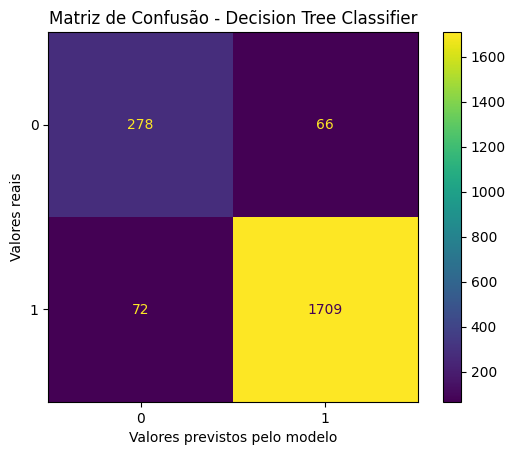

In [181]:
# calculando a matriz de confusão
cm = confusion_matrix(y_true = y_test, y_pred = y_pred, labels = tree.classes_)

# exibindo-a na tela
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree.classes_)
disp.plot()
plt.title('Matriz de Confusão - Decision Tree Classifier')
plt.ylabel('Valores reais')
plt.xlabel('Valores previstos pelo modelo')
plt.grid(visible = False)
plt.show()

Pelo resultado acima, a quantidade de verdadeiros positivos previstos pelo modelo, ou seja, casos em que o modelo preveniu que o cliente era churn e de fato ele era, foi de 278. A quantidade de verdadeiros negativos previstos pelo modelo (casos em que o modelo preveniu que o cliente não era churn e de fato ele não era) foi de 1709. Falsos positivos foram 72 casos e falsos negativos foram 66 casos. Desta forma, temos um total de erros = 72 + 66 = 138.

Calculando as métricas de performance deste modelo,

In [182]:
print(f'Acurácia Treino: {accuracy_score(y_train, tree.predict(x_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, tree.predict(x_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred)}')
print('------------------------------------------')
print(f'Precisão Treino: {precision_score(y_train, tree.predict(x_train))}')
print(f'Precisão Teste: {precision_score(y_test, y_pred)}')
print('------------------------------------------')
print(f'Recall Treino: {recall_score(y_train, tree.predict(x_train))}')
print(f'Recall Teste: {recall_score(y_test, y_pred)}')
print('------------------------------------------')
print(f'F1 Treino: {f1_score(y_train, tree.predict(x_train))}')
print(f'F1 Teste: {f1_score(y_test, y_pred)}')
print('------------------------------------------')
print(f'ROCAUC Treino: {roc_auc_score(y_train, tree.predict_proba(x_train)[:,1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, tree.predict_proba(x_test)[:,1])}')

Acurácia Treino: 1.0
Acurácia Teste: 0.9350588235294117
------------------------------------------
Acurácia Balanceada Treino: 1.0
Acurácia Balanceada Teste: 0.8838564041628038
------------------------------------------
Precisão Treino: 1.0
Precisão Teste: 0.9628169014084507
------------------------------------------
Recall Treino: 1.0
Recall Teste: 0.9595732734418866
------------------------------------------
F1 Treino: 1.0
F1 Teste: 0.9611923509561304
------------------------------------------
ROCAUC Treino: 1.0
ROCAUC Teste: 0.8838564041628038


Avaliando os resultados das métricas acima, percebe-se claramente que para este modelo Decision Tree Classifier, temos um caso de Overfitting, onde as métricas da base de treino são iguais 1. Isto acontece quando o modelo de machine learning "decora" a base de treino, acertando praticamente tudo, mas quando é passada uma nova base diferente, o modelo se perde em suas previsões. Portanto, será necessária uma otimização de hiperparâmetros para tentar corrigir este problema.

#### Otimizando os hiperparâmetros do modelo utilizando GridSearch

Para otimizar os hiperparâmetros do modelo Decision Tree Classifier testado anteriormente, foi utilizada a função GridSearchCV( ) da biblioteca sklearn, onde é passado um dicionário com os parâmetros que deseja-se otimizar, qual métrica será usada como base para escolher o melhor cenário e qual tipo de cross-validation será feito.

Neste projeto, utilizou-se como métrica de seleção a Acurácia, com um cross-validation padrão K-fold = 5.

In [185]:
parameters = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10]
}

grid_search_tree = GridSearchCV(estimator = tree, param_grid = parameters, scoring = "accuracy", cv = 5, n_jobs = -1)

In [186]:
grid_search_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

Exibindo a lista coms os hiperparâmetros a serem utilizados no modelo para otimizar sua performance,

In [187]:
grid_search_tree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Redefinindo o modelo com os hiperparâmetros otimizados,

In [188]:
tree_tunned = DecisionTreeClassifier(
    ccp_alpha =  0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 8,
    max_features = None,
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_weight_fraction_leaf = 0.0,
    random_state = None,
    splitter = 'best'
)

In [189]:
# treinando o modelo otimizado
tree_tunned.fit(x_train, y_train)

# calculando os novos resultados previstos
y_pred_tree_tun = tree_tunned.predict(x_test)

Calculando as novas métricas,

In [191]:
print(f'Acurácia Treino: {accuracy_score(y_train, tree_tunned.predict(x_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, tree_tunned.predict(x_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'Precisão Treino: {precision_score(y_train, tree_tunned.predict(x_train))}')
print(f'Precisão Teste: {precision_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'Recall Treino: {recall_score(y_train, tree_tunned.predict(x_train))}')
print(f'Recall Teste: {recall_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'F1 Treino: {f1_score(y_train, tree_tunned.predict(x_train))}')
print(f'F1 Teste: {f1_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'ROCAUC Treino: {roc_auc_score(y_train, tree_tunned.predict_proba(x_train)[:,1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, tree_tunned.predict_proba(x_test)[:,1])}')

Acurácia Treino: 0.9725585149313963
Acurácia Teste: 0.9411764705882353
------------------------------------------
Acurácia Balanceada Treino: 0.9444816965510001
Acurácia Balanceada Teste: 0.8933697752764974
------------------------------------------
Precisão Treino: 0.9823767563705644
Precisão Teste: 0.9656917885264342
------------------------------------------
Recall Treino: 0.9851922617625986
Recall Teste: 0.9640651319483436
------------------------------------------
F1 Treino: 0.9837824946339137
F1 Teste: 0.9648777746558022
------------------------------------------
ROCAUC Treino: 0.9893307137113668
ROCAUC Teste: 0.9160273820560698


Com a otimização dos hiperparâmetros, já é possível perceber que o problema de Overfitting foi corrigido, com métricas da base de treino e teste muito mais próximas uma da outra e métricas de treino inferiores a 1. O modelo escolhido e definido acima apresentou excelentes métricas, com uma acurácia de teste superior a 94%, precisão, recall e f1 acima dos 96%, e um roc score maior que 91%.

Plotando agora a curva ROC do modelo otimizado,

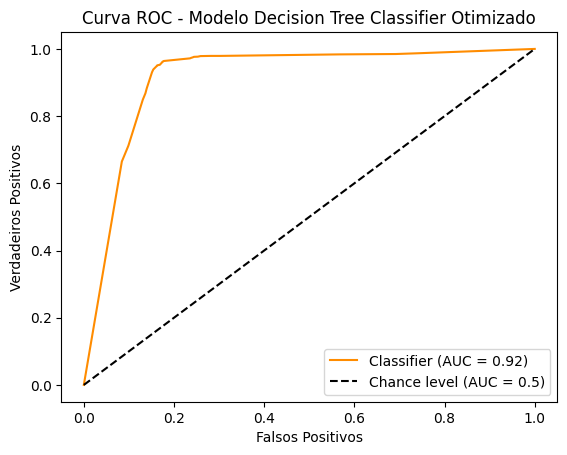

In [192]:
roc = tree_tunned.predict_proba(x_test)[:,1]

disp_roc = RocCurveDisplay.from_predictions(
    y_true = y_test,
    y_pred = roc,
    color = "darkorange",
    plot_chance_level = True
)
plt.title('Curva ROC - Modelo Decision Tree Classifier Otimizado')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdadeiros Positivos")
plt.show()

#### Gráfico das features mais importantes para o modelo

Plotando agora um gráfico de barras com as features mais importantes, que mais impactam na predição dos resultados de churn desta instituição.

In [194]:
# criando um dataset com as features e um ranking de importância
data = {
    'Features' : x.columns,
    'Ranking' : tree_tunned.feature_importances_
}

df_features = pd.DataFrame(data = data)
df_features.sort_values(by = 'Ranking', ascending = False, inplace = True)
df_features = df_features[df_features['Ranking'] > 0]

df_features

,Features,Ranking
30,Total_Trans_Ct,0.319978
26,Total_Revolving_Bal,0.230844
29,Total_Trans_Amt,0.147377
22,Total_Relationship_Count,0.086670
28,Total_Amt_Chng_Q4_Q1,0.065073
31,Total_Ct_Chng_Q4_Q1,0.060789
23,Months_Inactive_12_mon,0.014821
24,Contacts_Count_12_mon,0.014518
32,Avg_Utilization_Ratio,0.013464
19,Customer_Age,0.012877


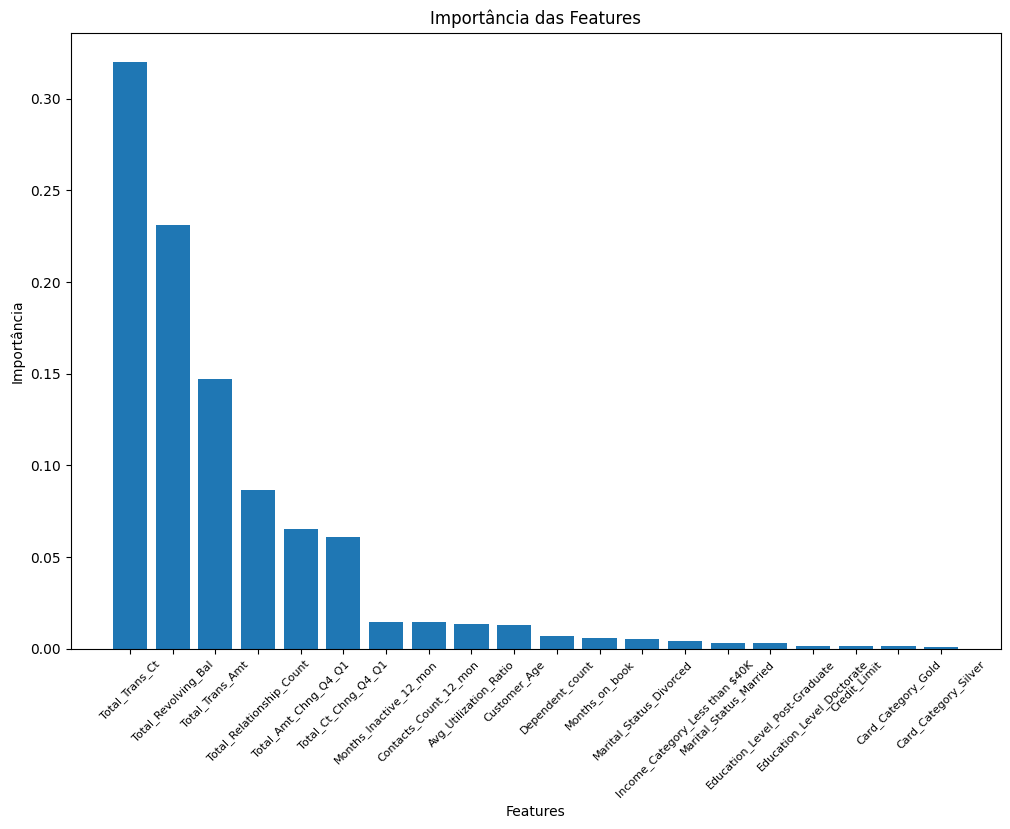

In [196]:
# plotando o resultado acima em um gráfico de barras
plt.figure(figsize = (12, 8))
plt.bar(
    x = df_features['Features'],
    height = df_features['Ranking']
)
plt.xticks(rotation = 45, size = 8)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')
plt.show()

Portanto, a variável explicativa que tem maior impacto neste modelo de classificação é "Total_Trans_Ct" que retorna a quantidade total de transações realizadas pelo cliente, seguido por "Total_Revolving_Bal" (saldo rotativo total no cartão) e "Total_Trans_Amt" (valor total de transações no cartão). Já as demais variáveis tem impactos bem inferiores a destas outras três.

## Conclusão

Com este projeto foi possível retirar alguns insights importantes ao análisar os dados desta instituição, principalmente no que diz respeito a faixa etária, poder aquisitivo e como isto está de fato refletindo nos produtos de cartões de crédito oferecidos por este banco. Esta instituição não está conseguindo conquistar os clientes para produtos de maior valor, existem muitos clientes com alto poder aquisito mais que tem o plano mais básico dos cartões, e isso pode e está refletindo nos casos de churn, visto que a maior porcentagem de clientes que desistiram dos cartões pertencem ao plano mais caro.

O modelo de classificação Decision Tree Classifier definido obteve uma excelente performance, acertando suas previsões em 94% dos casos, com 96% de precisão em acertar quais dos clientes serão de fato churn (verdadeiros positivos). Estes resultados são ótimos para serem tomadas decisões mais acertativas em clientes que muito provalmente irão abandonar os serviços de cartão de crédito ofericidos pelo banco.

No quesito de variáveis presentes no dataset, a lista de features mais importantes nos dize que quem está mais influenciando no churn de clientes é a quantidade total de transações que cada um deles realiza, seguido do saldo rotativo total e transações no cartão. Em outras palavras, clientes que estão muito inativos e não interagem de alguma forma com suas contas, não movimentam dinheiro, tem uma tendência alto ao cancelamento.

Por fim, deixo como sugestão a trabalhos futuros testar outros modelos de classificação, como Regressão Logística, Random Forest Classifier, KNN, SVM, para poder observar se é possível obter métricas melhores, tendo uma predição ainda mais acertivo e precisa. 